In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [2]:
# Input file
fN = h5py.File("../6823_2/6823_2_featuresN.hdf5")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
traj = pd.read_hdf("../6823_2/6823_2_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [3]:
# Get wells - data from timeseries_data, at position [2]
wells = ['A9', 'A10', 'A11', 'A12', 'B9', 'B10', 'B11', 'B12', 'C9', 'C10', 'C11', 'C12', 'D9', 'D10', 'D11', 'D12']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    #well_dict[well] = []
    if well in well_dict.keys():
        well_dict[well].append(i)

In [4]:
# Well positions:

d12 = [180, 710, 140, 670]
d11 = [180, 710, 860, 1390]
d10 = [180, 710, 1590, 2120]
d9 = [180, 710, 2300, 2830]

c12 = [900, 1430, 140, 670]
c11 = [900, 1430, 860, 1390]
c10 = [900, 1430, 1590, 2120]
c9 = [900, 1430, 2300, 2830]

b12 = [1620, 2150, 140, 670]
b11 = [1620, 2150, 860, 1390]
b10 = [1620, 2150, 1590, 2120]
b9 = [1620, 2150, 2300, 2830]

a12 = [2340, 2870, 140, 670]
a11 = [2340, 2870, 860, 1390]
a10 = [2340, 2870, 1590, 2120]
a9 = [2340, 2870, 2300, 2830]

In [5]:
well_names = list(well_dict.keys())
well_names

['A9',
 'A10',
 'A11',
 'A12',
 'B9',
 'B10',
 'B11',
 'B12',
 'C9',
 'C10',
 'C11',
 'C12',
 'D9',
 'D10',
 'D11',
 'D12']

In [ ]:
for well in well_names[-3:]:
    masks.make_well_masks(well=well, traj=traj, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../6823_2/", sequential=False)

In [ ]:
# Finished making masks! 

# Raw wells

In [6]:
wells = [d12,d11,d10,d9,c12,c11,c10,c9,b12,b11,b10,b9,a12,a11,a10,a9]
wells = wells[::-1]
wells
well_names = well_dict.keys()

In [7]:
for i, well_name in enumerate(well_names):
    output = "../6823_2/raw_wells/%s_raw.npy" % well_name
    raw.get_raw_well(wells[i], well_name=well_name, video_path="../6823_2/6823_2.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

-------- A9 --------
-------- A10 --------
-------- A11 --------
-------- A12 --------
-------- B9 --------
-------- B10 --------
-------- B11 --------
-------- B12 --------
-------- C9 --------
-------- C10 --------
-------- C11 --------
-------- C12 --------
-------- D9 --------
-------- D10 --------
-------- D11 --------
-------- D12 --------


In [8]:
for well_name in well_names:
    raw_video_path = '../6823_2/raw_wells/%s_raw.npy' % well_name
    txt = '../6823_2/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../6823_2')

(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 530, 1)
(100, 530, 5

Processing raw video.
unique_worm_ids:  [4, 8]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  [29]
sequential ids:  [1]


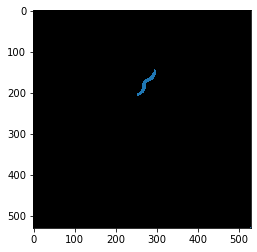

In [8]:
gif.plot_gif(np.load('../6823_2/A10_raw_1.npy'), '../6823_2/gif/A10_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6823_2/A10_mask_1.npy'), '../6823_2/gif/A10_mask_1.gif')

gif.plot_gif(np.load('../6823_2/D12_raw_1.npy'), '../6823_2/gif/D12_raw_1.gif', raw=True)
gif.plot_gif(np.load('../6823_2/D12_mask_1.npy'), '../6823_2/gif/D12_mask_1.gif')

# Make lineages

In [9]:
from lineage import make_lineage

a9_1 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_1.npy", 1)
a9_2 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_2.npy", 2)
a9_3 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_3.npy", 3)
a9_4 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_4.npy", 4)
a9_5 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_5.npy", 5)
a9_6 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_6.npy", 6)
a9_7 = make_lineage(traj, well_dict, 'A9', "6823_2", "../6823_2/A9_mask_7.npy", 7)

a10_1 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_1.npy", 1)
a10_2 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_2.npy", 2)
a10_3 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_3.npy", 3)
a10_4 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_4.npy", 4)
a10_5 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_5.npy", 5)
a10_6 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_6.npy", 6)
a10_7 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_7.npy", 7)
a10_8 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_8.npy", 8)
a10_9 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_9.npy", 9)
a10_10 = make_lineage(traj, well_dict, 'A10', "6823_2", "../6823_2/A10_mask_10.npy", 10)

a11_1 = make_lineage(traj, well_dict, 'A11', "6823_2", "../6823_2/A11_mask_1.npy", 1)
a11_2 = make_lineage(traj, well_dict, 'A11', "6823_2", "../6823_2/A11_mask_2.npy", 2)
a12_1 = make_lineage(traj, well_dict, 'A12', "6823_2", "../6823_2/A12_mask_1.npy", 1)
a12_2 = make_lineage(traj, well_dict, 'A12', "6823_2", "../6823_2/A12_mask_2.npy", 2)

b9_1 = make_lineage(traj, well_dict, 'B9', "6823_2", "../6823_2/B9_mask_1.npy", 1)

b10_1 = make_lineage(traj, well_dict, 'B10', "6823_2", "../6823_2/B10_mask_1.npy", 1)
b10_2 = make_lineage(traj, well_dict, 'B10', "6823_2", "../6823_2/B10_mask_2.npy", 2)

b11_1 = make_lineage(traj, well_dict, 'B11', "6823_2", "../6823_2/B11_mask_1.npy", 1)
b11_2 = make_lineage(traj, well_dict, 'B11', "6823_2", "../6823_2/B11_mask_2.npy", 2)
b11_3 = make_lineage(traj, well_dict, 'B11', "6823_2", "../6823_2/B11_mask_3.npy", 3)
b12_1 = make_lineage(traj, well_dict, 'B12', "6823_2", "../6823_2/B12_mask_1.npy", 1)
b12_2 = make_lineage(traj, well_dict, 'B12', "6823_2", "../6823_2/B12_mask_2.npy", 2)
b12_3 = make_lineage(traj, well_dict, 'B12', "6823_2", "../6823_2/B12_mask_3.npy", 3)

c9_1 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_1.npy", 1)
c9_2 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_2.npy", 2)
c9_3 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_3.npy", 3)
c9_4 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_4.npy", 4)
c9_5 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_5.npy", 5)
c9_6 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_6.npy", 6)
c9_7 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_7.npy", 7)
c9_8 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_8.npy", 8)
c9_9 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_9.npy", 9)
c9_10 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_10.npy", 10)
c9_11 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_11.npy", 11)
c9_12 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_12.npy", 12)
c9_13 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_13.npy", 13)
c9_14 = make_lineage(traj, well_dict, 'C9', "6823_2", "../6823_2/C9_mask_14.npy", 14)

c10_1 = make_lineage(traj, well_dict, 'C10', "6823_2", "../6823_2/C10_mask_1.npy", 1)
c10_2 = make_lineage(traj, well_dict, 'C10', "6823_2", "../6823_2/C10_mask_2.npy", 2)
c11_1 = make_lineage(traj, well_dict, 'C11', "6823_2", "../6823_2/C11_mask_1.npy", 1)
c11_2 = make_lineage(traj, well_dict, 'C11', "6823_2", "../6823_2/C11_mask_2.npy", 2)
c11_3 = make_lineage(traj, well_dict, 'C11', "6823_2", "../6823_2/C11_mask_3.npy", 3)

c12_1 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_1.npy", 1)
c12_2 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_2.npy", 2)
c12_3 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_3.npy", 3)
c12_4 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_4.npy", 4)
c12_5 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_5.npy", 5)
c12_6 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_6.npy", 6)
c12_7 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_7.npy", 7)
c12_8 = make_lineage(traj, well_dict, 'C12', "6823_2", "../6823_2/C12_mask_8.npy", 8)

d9_1 = make_lineage(traj, well_dict, 'D9', "6823_2", "../6823_2/D9_mask_1.npy", 1)


d10_1 = make_lineage(traj, well_dict, 'D10', "6823_2", "../6823_2/D10_mask_1.npy", 1)
d10_2 = make_lineage(traj, well_dict, 'D10', "6823_2", "../6823_2/D10_mask_2.npy", 2)
d10_3 = make_lineage(traj, well_dict, 'D10', "6823_2", "../6823_2/D10_mask_3.npy", 3)

d11_1 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_1.npy", 1)
d11_2 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_2.npy", 2)
d11_3 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_3.npy", 3)
d11_4 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_4.npy", 4)
d11_5 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_5.npy", 5)
d11_6 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_6.npy", 6)
d11_7 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_7.npy", 7)
d11_8 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_8.npy", 8)
d11_9 = make_lineage(traj, well_dict, 'D11', "6823_2", "../6823_2/D11_mask_9.npy", 9)

d12_1 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_1.npy", 1)
d12_2 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_2.npy", 2)
d12_3 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_3.npy", 3)
d12_4 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_4.npy", 4)
d12_5 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_5.npy", 5)
d12_6 = make_lineage(traj, well_dict, 'D12', "6823_2", "../6823_2/D12_mask_6.npy", 6)

In [10]:
masks_fn = [
    "../6823_2/A9_mask_1.npy",
    "../6823_2/A9_mask_2.npy",
    "../6823_2/A9_mask_3.npy",
    "../6823_2/A9_mask_4.npy",
    "../6823_2/A9_mask_5.npy",
    "../6823_2/A9_mask_6.npy",
    "../6823_2/A9_mask_7.npy",

    "../6823_2/A10_mask_1.npy",
    "../6823_2/A10_mask_2.npy",
    "../6823_2/A10_mask_3.npy",
    "../6823_2/A10_mask_4.npy",
    "../6823_2/A10_mask_5.npy",
    "../6823_2/A10_mask_6.npy",
    "../6823_2/A10_mask_7.npy",
    "../6823_2/A10_mask_8.npy",
    "../6823_2/A10_mask_9.npy",
    "../6823_2/A10_mask_10.npy",

    "../6823_2/A11_mask_1.npy",
    "../6823_2/A11_mask_2.npy",
    "../6823_2/A12_mask_1.npy",
    "../6823_2/A12_mask_2.npy",

    "../6823_2/B9_mask_1.npy",

    "../6823_2/B10_mask_1.npy",
    "../6823_2/B10_mask_2.npy",

    "../6823_2/B11_mask_1.npy",
    "../6823_2/B11_mask_2.npy",
    "../6823_2/B11_mask_3.npy",
    "../6823_2/B12_mask_1.npy",
    "../6823_2/B12_mask_2.npy",
    "../6823_2/B12_mask_3.npy",

    "../6823_2/C9_mask_1.npy",
    "../6823_2/C9_mask_2.npy",
    "../6823_2/C9_mask_3.npy",
    "../6823_2/C9_mask_4.npy",
    "../6823_2/C9_mask_5.npy",
    "../6823_2/C9_mask_6.npy",
    "../6823_2/C9_mask_7.npy",
    "../6823_2/C9_mask_8.npy",
    "../6823_2/C9_mask_9.npy",
    "../6823_2/C9_mask_10.npy",
    "../6823_2/C9_mask_11.npy",
    "../6823_2/C9_mask_12.npy",
    "../6823_2/C9_mask_13.npy",
    "../6823_2/C9_mask_14.npy",

    "../6823_2/C10_mask_1.npy",
    "../6823_2/C10_mask_2.npy",
    "../6823_2/C11_mask_1.npy",
    "../6823_2/C11_mask_2.npy",
    "../6823_2/C11_mask_3.npy",

    "../6823_2/C12_mask_1.npy",
    "../6823_2/C12_mask_2.npy",
    "../6823_2/C12_mask_3.npy",
    "../6823_2/C12_mask_4.npy",
    "../6823_2/C12_mask_5.npy",
    "../6823_2/C12_mask_6.npy",
    "../6823_2/C12_mask_7.npy",
    "../6823_2/C12_mask_8.npy",

    "../6823_2/D9_mask_1.npy",


    "../6823_2/D10_mask_1.npy",
    "../6823_2/D10_mask_2.npy",
    "../6823_2/D10_mask_3.npy",

    "../6823_2/D11_mask_1.npy",
    "../6823_2/D11_mask_2.npy",
    "../6823_2/D11_mask_3.npy",
    "../6823_2/D11_mask_4.npy",
    "../6823_2/D11_mask_5.npy",
    "../6823_2/D11_mask_6.npy",
    "../6823_2/D11_mask_7.npy",
    "../6823_2/D11_mask_8.npy",
    "../6823_2/D11_mask_9.npy",

    "../6823_2/D12_mask_1.npy",
    "../6823_2/D12_mask_2.npy",
    "../6823_2/D12_mask_3.npy",
    "../6823_2/D12_mask_4.npy",
    "../6823_2/D12_mask_5.npy",
    "../6823_2/D12_mask_6.npy"
]

In [17]:
raw_fn = [
    "../6823_2/A9_raw_1.npy",
    "../6823_2/A9_raw_2.npy",
    "../6823_2/A9_raw_3.npy",
    "../6823_2/A9_raw_4.npy",
    "../6823_2/A9_raw_5.npy",
    "../6823_2/A9_raw_6.npy",
    "../6823_2/A9_raw_7.npy",

    "../6823_2/A10_raw_1.npy",
    "../6823_2/A10_raw_2.npy",
    "../6823_2/A10_raw_3.npy",
    "../6823_2/A10_raw_4.npy",
    "../6823_2/A10_raw_5.npy",
    "../6823_2/A10_raw_6.npy",
    "../6823_2/A10_raw_7.npy",
    "../6823_2/A10_raw_8.npy",
    "../6823_2/A10_raw_9.npy",
    "../6823_2/A10__raw_10.npy",

    "../6823_2/A11_raw_1.npy",
    "../6823_2/A11_raw_2.npy",
    "../6823_2/A12_raw_1.npy",
    "../6823_2/A12_raw_2.npy",

    "../6823_2/B9_raw_1.npy",

    "../6823_2/B10_raw_1.npy",
    "../6823_2/B10_raw_2.npy",

    "../6823_2/B11_raw_1.npy",
    "../6823_2/B11_raw_2.npy",
    "../6823_2/B11_raw_3.npy",
    "../6823_2/B12_raw_1.npy",
    "../6823_2/B12_raw_2.npy",
    "../6823_2/B12_raw_3.npy",

    "../6823_2/C9_raw_1.npy",
    "../6823_2/C9_raw_2.npy",
    "../6823_2/C9_raw_3.npy",
    "../6823_2/C9_raw_4.npy",
    "../6823_2/C9_raw_5.npy",
    "../6823_2/C9_raw_6.npy",
    "../6823_2/C9_raw_7.npy",
    "../6823_2/C9_raw_8.npy",
    "../6823_2/C9_raw_9.npy",
    "../6823_2/C9_raw_10.npy",
    "../6823_2/C9_raw_11.npy",
    "../6823_2/C9_raw_12.npy",
    "../6823_2/C9_raw_13.npy",
    "../6823_2/C9_raw_14.npy",

    "../6823_2/C10_raw_1.npy",
    "../6823_2/C10_raw_2.npy",
    "../6823_2/C11_raw_1.npy",
    "../6823_2/C11_raw_2.npy",
    "../6823_2/C11_raw_3.npy",

    "../6823_2/C12_raw_1.npy",
    "../6823_2/C12_raw_2.npy",
    "../6823_2/C12_raw_3.npy",
    "../6823_2/C12_raw_4.npy",
    "../6823_2/C12_raw_5.npy",
    "../6823_2/C12_raw_6.npy",
    "../6823_2/C12_raw_7.npy",
    "../6823_2/C12_raw_8.npy",

    "../6823_2/D9_raw_1.npy",


    "../6823_2/D10_raw_1.npy",
    "../6823_2/D10_raw_2.npy",
    "../6823_2/D10_raw_3.npy",

    "../6823_2/D11_raw_1.npy",
    "../6823_2/D11_raw_2.npy",
    "../6823_2/D11_raw_3.npy",
    "../6823_2/D11_raw_4.npy",
    "../6823_2/D11_raw_5.npy",
    "../6823_2/D11_raw_6.npy",
    "../6823_2/D11_raw_7.npy",
    "../6823_2/D11_raw_8.npy",
    "../6823_2/D11_raw_9.npy",

    "../6823_2/D12_raw_1.npy",
    "../6823_2/D12_raw_2.npy",
    "../6823_2/D12_raw_3.npy",
    "../6823_2/D12_raw_4.npy",
    "../6823_2/D12_raw_5.npy",
    "../6823_2/D12_raw_6.npy"
]

In [13]:
lineages = [
    a9_1,
    a9_2,
    a9_3,
    a9_4,
    a9_5,
    a9_6,
    a9_7,

    a10_1,
    a10_2,
    a10_3,
    a10_4,
    a10_5,
    a10_6,
    a10_7,
    a10_8,
    a10_9,
    a10_10,

    a11_1,
    a11_2,
    a12_1,
    a12_2,

    b9_1,

    b10_1,
    b10_2,

    b11_1,
    b11_2,
    b11_3,
    b12_1,
    b12_2,
    b12_3,

    c9_1,
    c9_2,
    c9_3,
    c9_4,
    c9_5,
    c9_6,
    c9_7,
    c9_8,
    c9_9,
    c9_10,
    c9_11,
    c9_12,
    c9_13,
    c9_14,

    c10_1,
    c10_2,
    c11_1,
    c11_2,
    c11_3,

    c12_1,
    c12_2,
    c12_3,
    c12_4,
    c12_5,
    c12_6,
    c12_7,
    c12_8,

    d9_1,


    d10_1,
    d10_2,
    d10_3,

    d11_1,
    d11_2,
    d11_3,
    d11_4,
    d11_5,
    d11_6,
    d11_7,
    d11_8,
    d11_9,

    d12_1,
    d12_2,
    d12_3,
    d12_4,
    d12_5,
    d12_6
]

In [18]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raw_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

33
33
33


In [19]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../6823_2/6823_2.trks", lineages_true, X, y)

/opt/conda/lib/python3.7/site-packages/tensorflow-2.5.0-py3.7-linux-x86_64.egg/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
